In [4]:
import ace_tools_open as tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import (generate_gaussian_A, 
                   generate_t_distribution_A, 
                   compute_matrices, 
                   compute_left_singular_vectors,
                   basic_matrix_multiplication,
                   compute_sampling_probabilities)

In [5]:
n, d = 500, 50
seed = 1234  

A_GA = generate_gaussian_A(n, d, seed=seed)
A_T3 = generate_t_distribution_A(n, d, df=3, seed=seed)
A_T1 = generate_t_distribution_A(n, d, df=1, seed=seed)

U_A_GA = compute_left_singular_vectors(A_GA)
U_A_T3 = compute_left_singular_vectors(A_T3)
U_A_T1 = compute_left_singular_vectors(A_T1)

results_GA = compute_matrices(A_GA)
results_T3 = compute_matrices(A_T3)
results_T1 = compute_matrices(A_T1)

In [6]:
def compute_approximation_errors(X, p, c_values):
    """
    For a given matrix X (to approximate X X^T), its sampling distribution p,
    and a list of sample sizes (c_values), compute the relative spectral and Frobenius errors.
    
    Returns:
      spectral_errors: list of relative spectral norm errors.
      fro_errors: list of relative Frobenius norm errors.
    """
    spectral_errors = []
    fro_errors = []
    exact = X @ X.T
    norm_exact_spec = np.linalg.norm(exact, 2)
    norm_exact_fro = np.linalg.norm(exact, 'fro')
    
    for c in c_values:
        C, R = basic_matrix_multiplication(X, X.T, c, p)
        approx = C @ R
        err_spec = np.linalg.norm(approx - exact, 2) / norm_exact_spec
        err_fro = np.linalg.norm(approx - exact, 'fro') / norm_exact_fro
        spectral_errors.append(err_spec)
        fro_errors.append(err_fro)
    return spectral_errors, fro_errors

def plot_probability_distribution(p, title):
    """
    Plot a bar chart for the probability distribution p.
    """
    plt.figure(figsize=(6, 4))
    plt.bar(np.arange(len(p)), p)
    plt.xlabel("Index")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()

def plot_errors(c_values, spectral_errors, fro_errors, title):
    """
    Plot the relative spectral and Frobenius norm errors versus the number of samples.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(c_values, spectral_errors, marker='o', label="Spectral Error")
    plt.plot(c_values, fro_errors, marker='s', label="Frobenius Error")
    plt.xlabel("Number of Samples (c)")
    plt.ylabel("Relative Error")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

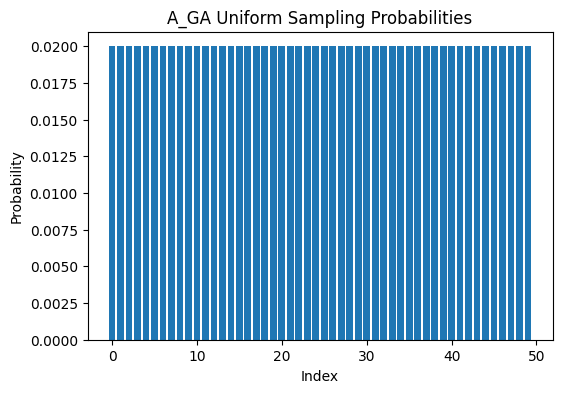

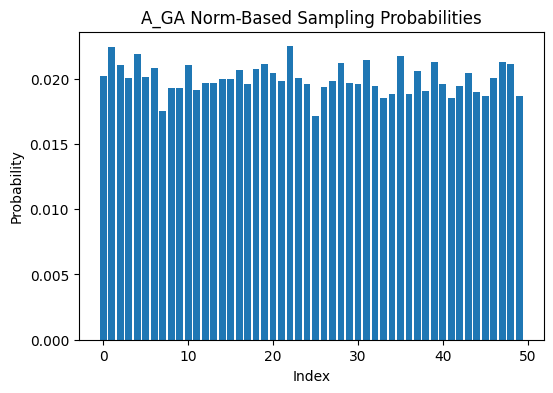

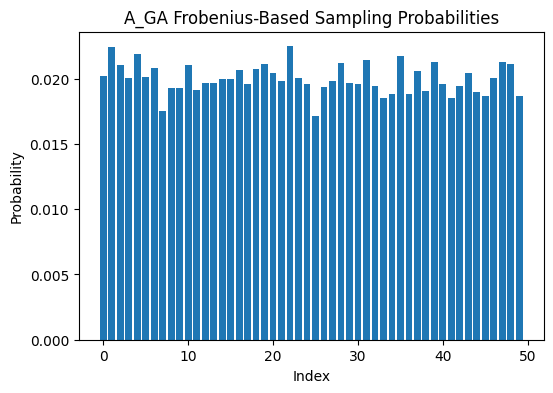

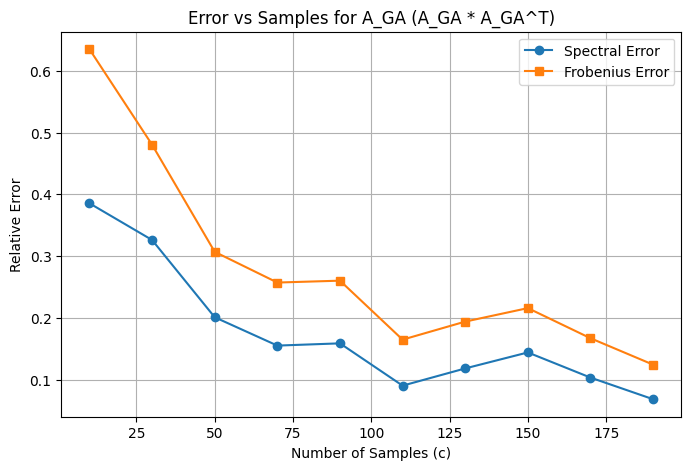

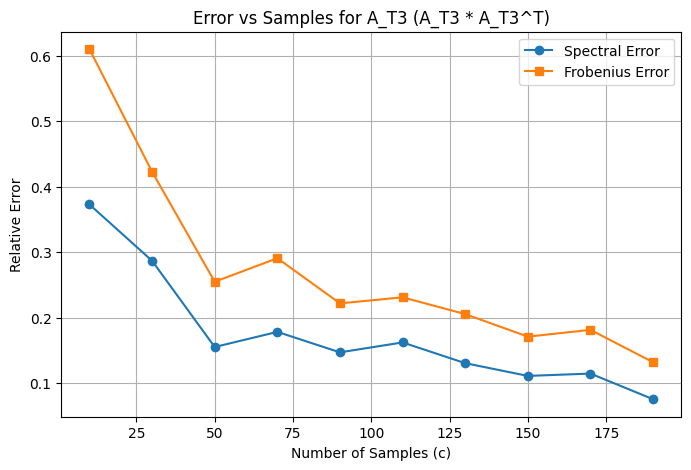

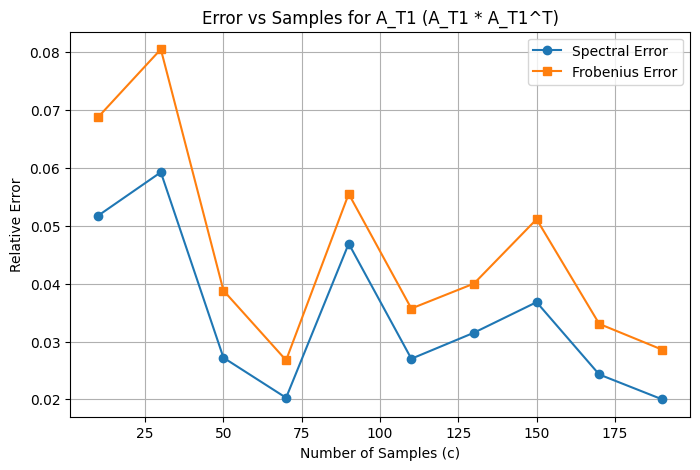

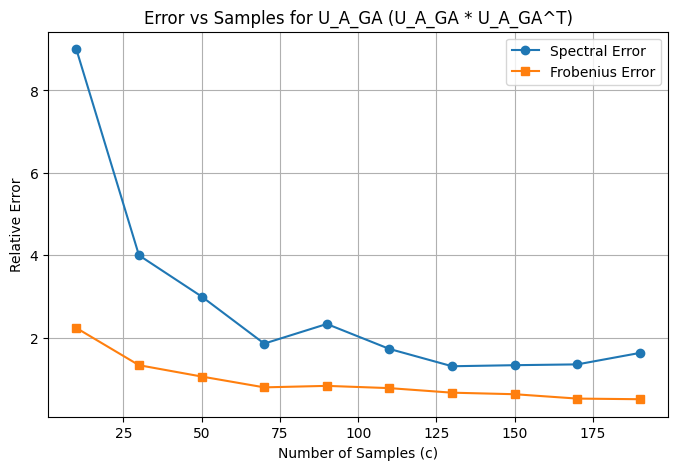

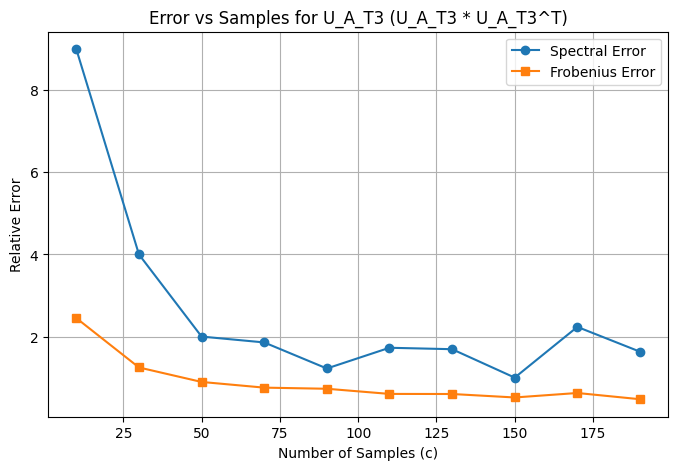

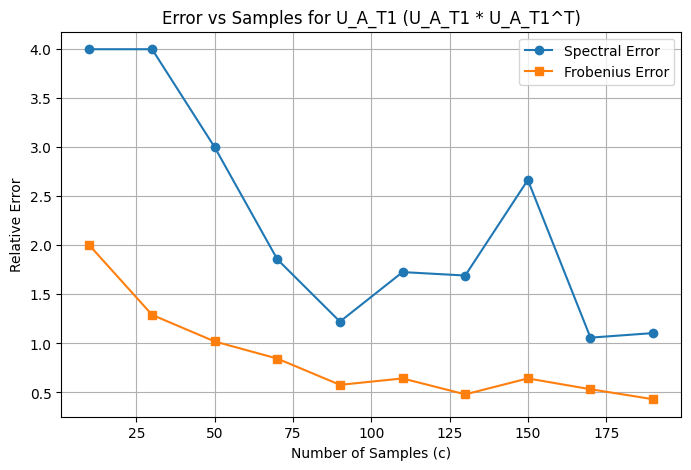

In [ ]:
A_GA_p_uniform   = compute_sampling_probabilities(A_GA, A_GA.T, method="uniform")
A_GA_p_norm_based = compute_sampling_probabilities(A_GA, A_GA.T, method="norm_based")
A_GA_p_frobenius = compute_sampling_probabilities(A_GA, A_GA.T, method="frobenius_based")

plot_probability_distribution(A_GA_p_uniform, "A_GA Uniform Sampling Probabilities")
plot_probability_distribution(A_GA_p_norm_based, "A_GA Norm-Based Sampling Probabilities")
plot_probability_distribution(A_GA_p_frobenius, "A_GA Frobenius-Based Sampling Probabilities")

# Define a range of sample sizes (c-values) to test:
c_values = list(range(10, 210, 20)) 

# Compute and plot errors for A_GA approximating A_GA * A_GA^T using Frobenius-based probabilities:
spec_err_A_GA, fro_err_A_GA = compute_approximation_errors(A_GA, A_GA_p_frobenius, c_values)
plot_errors(c_values, spec_err_A_GA, fro_err_A_GA, "Error vs Samples for A_GA (A_GA * A_GA^T)")

# Similarly, for T3 and T1 matrices:
A_T3_p_frobenius = compute_sampling_probabilities(A_T3, A_T3.T, method="frobenius_based")
spec_err_A_T3, fro_err_A_T3 = compute_approximation_errors(A_T3, A_T3_p_frobenius, c_values)
plot_errors(c_values, spec_err_A_T3, fro_err_A_T3, "Error vs Samples for A_T3 (A_T3 * A_T3^T)")

A_T1_p_frobenius = compute_sampling_probabilities(A_T1, A_T1.T, method="frobenius_based")
spec_err_A_T1, fro_err_A_T1 = compute_approximation_errors(A_T1, A_T1_p_frobenius, c_values)
plot_errors(c_values, spec_err_A_T1, fro_err_A_T1, "Error vs Samples for A_T1 (A_T1 * A_T1^T)")

# For the matrices of left singular vectors (U_A), note that U_A^T U_A is exactly I.
# Thus, the exact product is the identity matrix.
U_A_GA_p_frobenius = compute_sampling_probabilities(U_A_GA, U_A_GA.T, method="frobenius_based")
spec_err_U_A_GA, fro_err_U_A_GA = compute_approximation_errors(U_A_GA, U_A_GA_p_frobenius, c_values)
plot_errors(c_values, spec_err_U_A_GA, fro_err_U_A_GA, "Error vs Samples for U_A_GA (U_A_GA * U_A_GA^T)")

U_A_T3_p_frobenius = compute_sampling_probabilities(U_A_T3, U_A_T3.T, method="frobenius_based")
spec_err_U_A_T3, fro_err_U_A_T3 = compute_approximation_errors(U_A_T3, U_A_T3_p_frobenius, c_values)
plot_errors(c_values, spec_err_U_A_T3, fro_err_U_A_T3, "Error vs Samples for U_A_T3 (U_A_T3 * U_A_T3^T)")

U_A_T1_p_frobenius = compute_sampling_probabilities(U_A_T1, U_A_T1.T, method="frobenius_based") 
spec_err_U_A_T1, fro_err_U_A_T1 = compute_approximation_errors(U_A_T1, U_A_T1_p_frobenius, c_values)
plot_errors(c_values, spec_err_U_A_T1, fro_err_U_A_T1, "Error vs Samples for U_A_T1 (U_A_T1 * U_A_T1^T)")

In [8]:
df_results = pd.DataFrame({
    "Dataset": ["GA", "T3", "T1"],
    "Frobenius Norm A^T A": [
        np.linalg.norm(results_GA[0], 'fro'),
        np.linalg.norm(results_T3[0], 'fro'),
        np.linalg.norm(results_T1[0], 'fro')
    ],
    "Frobenius Norm U_A^T U_A (SVD)": [
        np.linalg.norm(results_GA[1], 'fro'),
        np.linalg.norm(results_T3[1], 'fro'),
        np.linalg.norm(results_T1[1], 'fro')
    ],
    "Frobenius Norm U_A^T U_A (QR)": [
        np.linalg.norm(results_GA[2], 'fro'),
        np.linalg.norm(results_T3[2], 'fro'),
        np.linalg.norm(results_T1[2], 'fro')
    ]
})

tools.display_dataframe_to_user(name="Matrix Norm Comparisons", dataframe=df_results)

Matrix Norm Comparisons
